In [1]:
import numpy as np
import matplotlib.pyplot as plt

import keras
from keras.models import Sequential
from keras.layers import Dense ,Conv2D, MaxPool2D ,Flatten, Dropout
from keras.datasets import mnist

In [2]:
mnist.load_data?

Signature: mnist.load_data(path='mnist.npz')
Docstring:
Loads the MNIST dataset.

This is a dataset of 60,000 28x28 grayscale images of the 10 digits,
along with a test set of 10,000 images.
More info can be found at the
[MNIST homepage](http://yann.lecun.com/exdb/mnist/).

Args:
  path: path where to cache the dataset locally
    (relative to `~/.keras/datasets`).

Returns:
  Tuple of NumPy arrays: `(x_train, y_train), (x_test, y_test)`.

**x_train**: uint8 NumPy array of grayscale image data with shapes
  `(60000, 28, 28)`, containing the training data. Pixel values range
  from 0 to 255.

**y_train**: uint8 NumPy array of digit labels (integers in range 0-9)
  with shape `(60000,)` for the training data.

**x_test**: uint8 NumPy array of grayscale image data with shapes
  (10000, 28, 28), containing the test data. Pixel values range
  from 0 to 255.

**y_test**: uint8 NumPy array of digit labels (integers in range 0-9)
  with shape `(10000,)` for the test data.

Example:

```python


In [3]:
(x_train, y_train), (x_test, y_test)=mnist.load_data()

x_train.shape ,y_train.shape ,x_test.shape ,y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

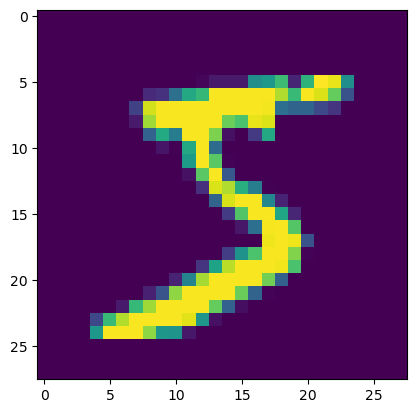

In [4]:
plt.imshow(x_train[0])

In [5]:
def plot_input_img(i):
   plt.imshow(x_train[i], cmap='binary')
   plt.title(y_train[i])
   # plt.axes('off')
   plt.show()

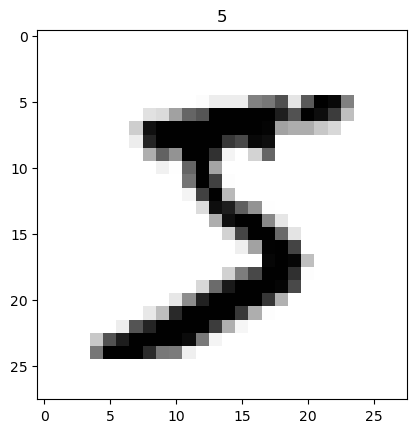

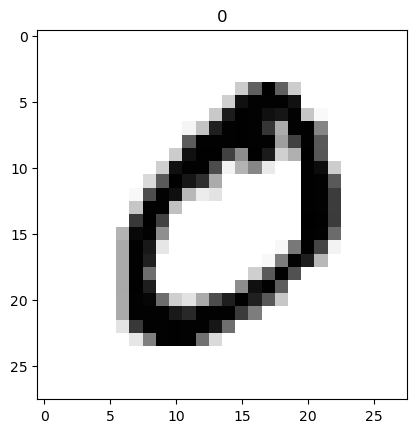

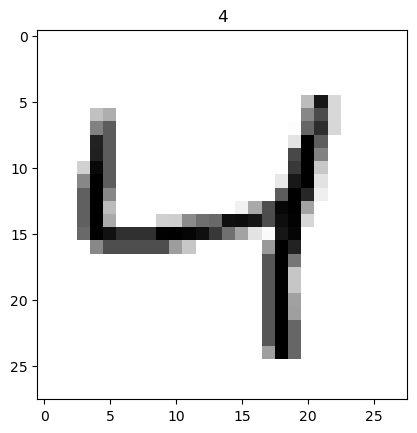

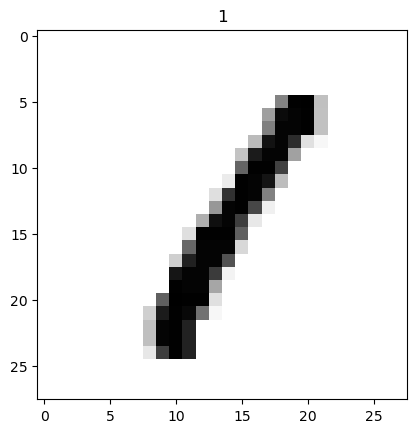

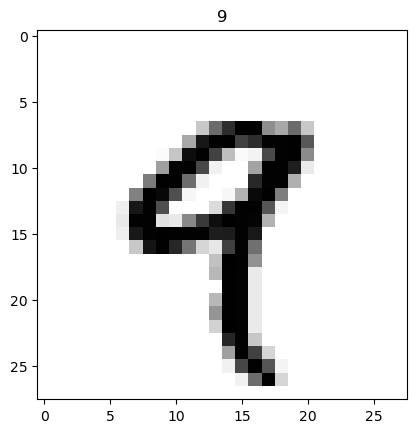

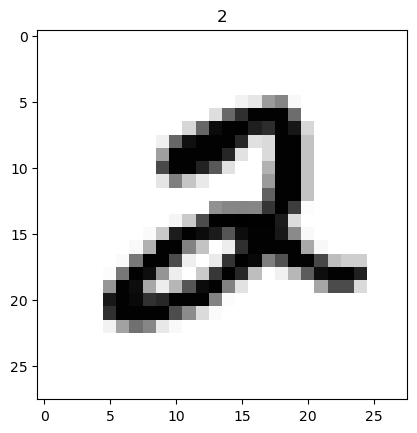

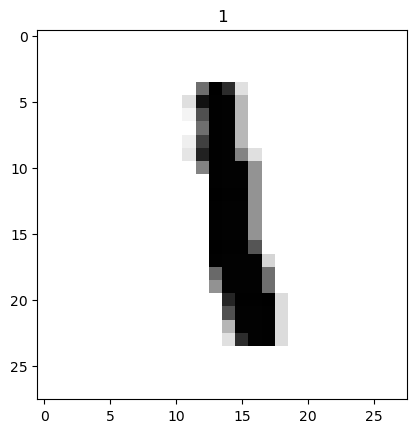

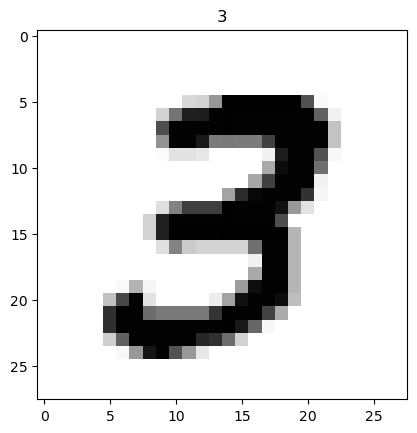

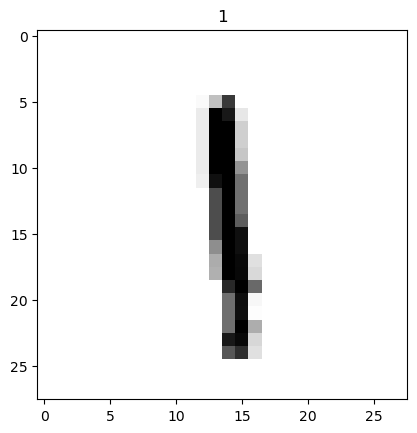

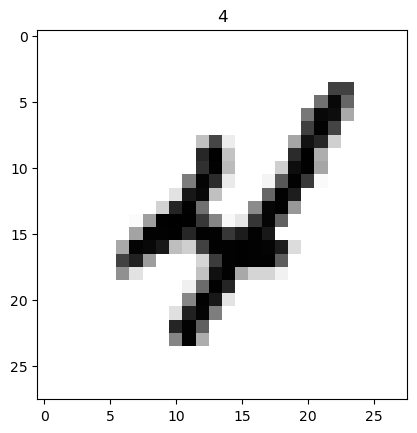

In [6]:
for i in range(10):
   plot_input_img(i)

In [7]:
#pre process the images

#normalizing the image to [0,1] range
x_train =x_train.astype(np.float32)/255
x_test =x_test.astype(np.float32)/255


#reshape /expand the dimention of images to (28,28,1)
x_train=np.expand_dims(x_train, -1)
x_test=np.expand_dims(x_test, -1)

#convert classes to one hot vectors
y_train=keras.utils.to_categorical(y_train)
y_test=keras.utils.to_categorical(y_test)

In [8]:
model=Sequential()
model.add(Conv2D(32, (3,3), input_shape= (28,28,1) , activation='relu'))
model.add(MaxPool2D((2,2)))

model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPool2D((2,2)))


model.add(Flatten())


model.add(Dropout(0.25))

model.add(Dense(10,activation="softmax"))

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dropout (Dropout)           (None, 1600)              0

In [10]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 5200766475409548209
xla_global_id: -1
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 3640655872
locality {
  bus_id: 1
  links {
  }
}
incarnation: 9699748609029702664
physical_device_desc: "device: 0, name: NVIDIA GeForce RTX 3060 Laptop GPU, pci bus id: 0000:01:00.0, compute capability: 8.6"
xla_global_id: 416903419
]


In [11]:
import tensorflow as tf

print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))
print(tf.config.experimental.list_physical_devices('GPU'))


Num GPUs Available:  1
[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [12]:
import tensorflow as tf
tf.config.list_physical_devices("GPU")

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [13]:
model.compile(optimizer= 'adam',loss=keras.losses.categorical_crossentropy ,metrics=['accuracy'])

In [14]:
#Callbacks

from keras.callbacks import EarlyStopping, ModelCheckpoint

#Earlystopping

es=EarlyStopping(monitor='val_acc' ,min_delta=0.01, patience =4, verbose =1)

#Model check Point

mc=ModelCheckpoint("./foml.h5",moniter="val_acc" ,verbose=1,save_best_only= True )

cb = [es,mc]

In [15]:
#model training

his =model.fit(x_train, y_train, epochs= 15, validation_split=0.3,callbacks= cb)

Epoch 1/15
1313/1313 [==============================] - ETA: 0s - loss: 0.2151 - accuracy: 0.9343WARNING:tensorflow:Early stopping conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy

Epoch 1: val_loss improved from inf to 0.07820, saving model to .\foml.h5
1313/1313 [==============================] - 10s 3ms/step - loss: 0.2151 - accuracy: 0.9343 - val_loss: 0.0782 - val_accuracy: 0.9764
Epoch 2/15
1295/1313 [============================>.] - ETA: 0s - loss: 0.0727 - accuracy: 0.9782WARNING:tensorflow:Early stopping conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy

Epoch 2: val_loss improved from 0.07820 to 0.06000, saving model to .\foml.h5
1313/1313 [==============================] - 4s 3ms/step - loss: 0.0726 - accuracy: 0.9782 - val_loss: 0.0600 - val_accuracy: 0.9802
Epoch 3/15
1299/1313 [============================>.] - ETA: 0s - loss: 0.0542 - accura

In [16]:
model_S=keras.models.load_model("./foml.h5")

In [17]:
score =model_S.evaluate(x_test,y_test)
print(f' the model accuracy is {score[1]}')

313/313 [==============================] - 1s 2ms/step - loss: 0.0306 - accuracy: 0.9910
 the model accuracy is 0.9909999966621399
